Задание: Создайте класс по работе с тригонометрическими функциями. В классе должны быть реализованы функции вычисления:

− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы.

In [ ]:
from math import *
class Work:
    def __init__(self, grad):
        self.grad = grad

    def cos(self):
        return cos(radians(self.grad))

    def sin(self):
        return sin(radians(self.grad))

    def tan(self):
        return tan(radians(self.grad))

    def arcsin(self):
        return degrees(asin(radians(self.grad)))

    def arccos(self):
        return degrees(acos(radians(self.grad)))

    def arctan(self):
        return degrees(atan(radians(self.grad)))

    def grad_to_rad(self):
        return radians(self.grad)


ex = Work(30)
print(ex.cos())
print(ex.sin())
print(ex.tan())
print(ex.arcsin())
print(ex.arccos())
print(ex.arctan())
print(ex.grad_to_rad())


Постройте классификатор на основе дерева принятия решений следующего датасета:

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
target = [0,0,0,1,1,1]
X_train, X_test, y_train, y_test = train_test_split(
    # поскольку ирис это pandas-таблица, для нее нужно указать iloc
    X,    # все колонки кроме последней - в признаки
    target, # последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)

X_train,'\n', X_test,'\n', y_train, '\n', y_test

(array([[ 2,  1],
        [ 1,  1],
        [ 3,  2],
        [-1, -1]]),
 '\n',
 array([[-3, -2],
        [-2, -1]]),
 '\n',
 [1, 1, 1, 0],
 '\n',
 [0, 0])

[Text(0.5, 0.75, 'X[1] <= 0.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

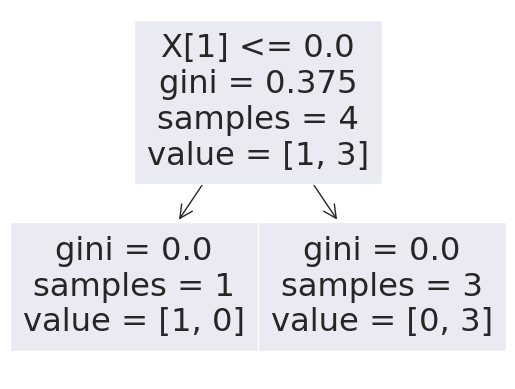

In [3]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
from sklearn import tree
tree.plot_tree(classifier)

In [4]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0])

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Задание Задача: Задание. Постройте модель регрессии для данных из предыдущей рабочей тетради.Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина: https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv Постройте прогноз. Оцените точность модели.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataset = pd.read_csv(url)
dataset.head()

from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


# теперь, когда у нас есть атрибуты и метки, необходимо разделить их
# на обучающий и тестовый наборы. приведенный фрагмент разделяет 80% на
# обучающий набор и 20% на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать
# его экземпляр и вызвать метод fit()
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# построим прогноз
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)

# рассчитаем среднюю абсолютную и квадратичную ошибку
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

   Actual  Predicted
0     534      547.0
1     410      414.0
2     577      574.0
3     571      554.0
4     577      574.0
5     704      574.0
6     487      628.0
7     587      525.0
8     467      414.0
9     580      464.0
MSE: 5738.2
MAE: 54.2


9.39714646920715